# Import Libraries

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Section 1

In [23]:
data = pd.read_csv('heart_disease_uci.csv')

In [24]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [25]:
# Dropping 'id' and 'dataset' columns
data = data.drop(['id', 'dataset'], axis=1)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [26]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [27]:
data.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [28]:
data.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [29]:
# Fill missing values for numeric columns with the median
numeric_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numeric_cols:
    median = data[col].median()
    data[col].fillna(median, inplace=True)

# Fill missing values for categorical columns with the mode
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    mode = data[col].mode()[0]
    data[col].fillna(mode, inplace=True)

In [30]:
# Check the updated missing values count
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [31]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,131.995652,199.908696,137.692391,0.853261,0.227174,0.995652
std,9.424685,18.451300,109.040171,25.145235,1.058049,0.628936,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


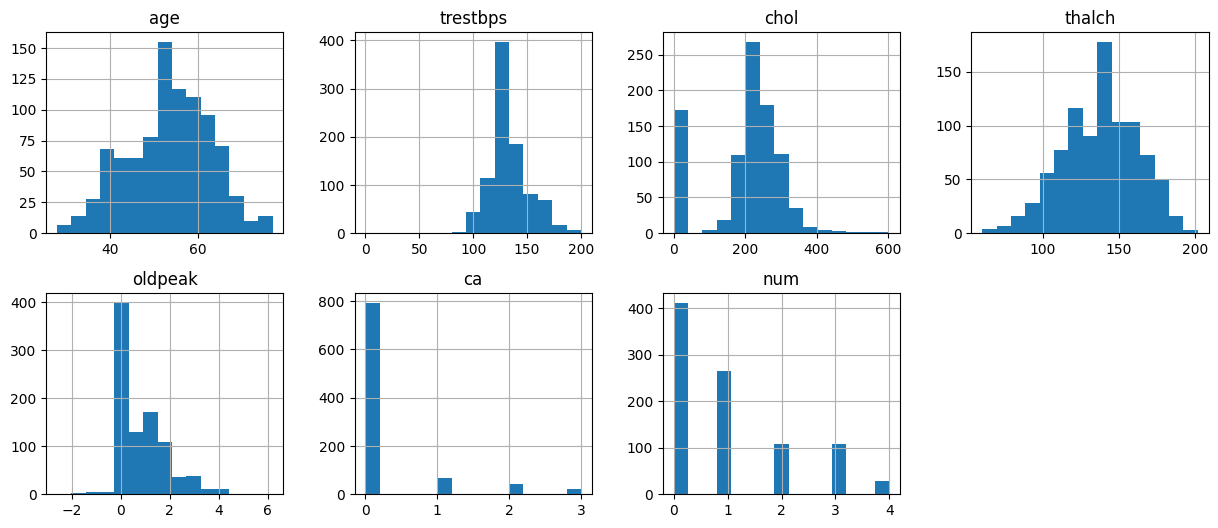

In [32]:
# Histograms for numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()

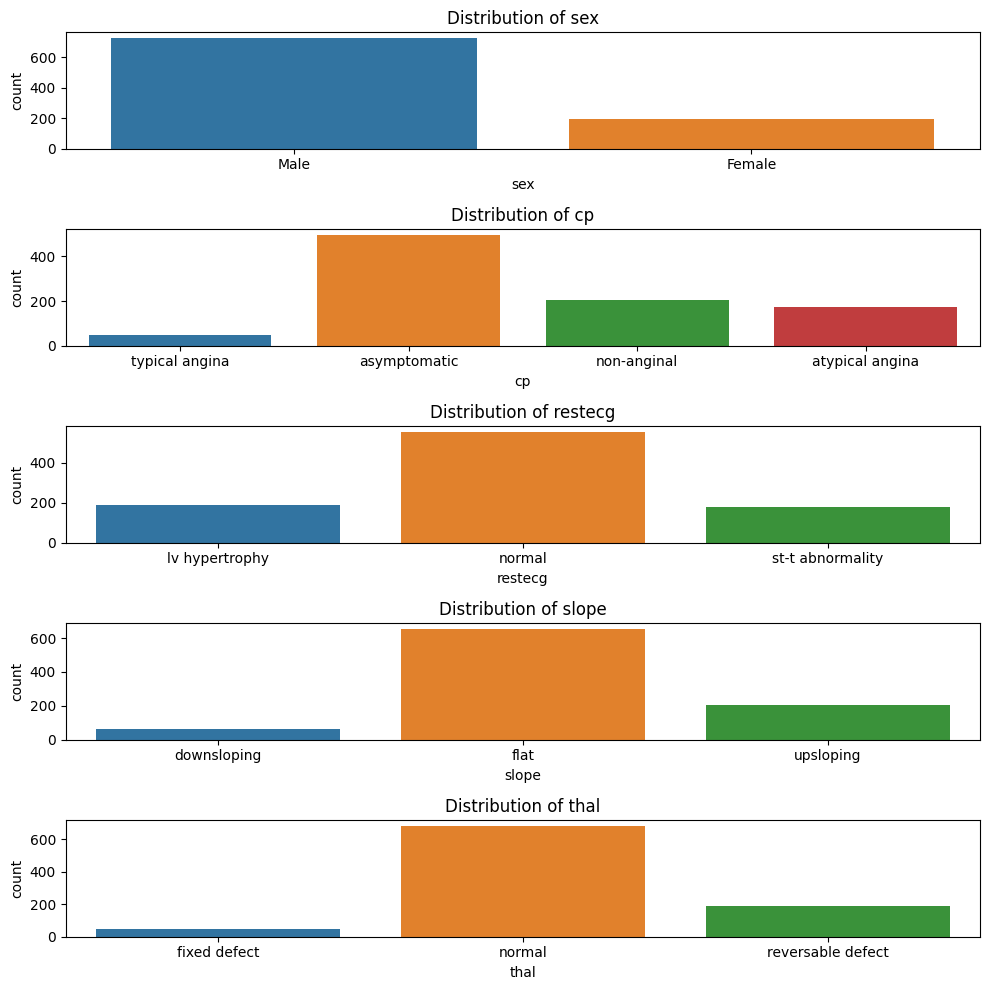

In [33]:
# Bar charts for categorical features
categorical_features = data.select_dtypes(include=['object']).columns
plt.figure(figsize=(10, len(categorical_features) * 2))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

In [34]:
# Apply one-hot encoding to categorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
data = pd.get_dummies(data, columns=categorical_cols)

In [35]:
data.head()

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,67,160.0,286.0,108.0,1.5,3.0,2,0,1,1,...,0,0,0,1,0,1,0,0,1,0
2,67,120.0,229.0,129.0,2.6,2.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0.0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,41,130.0,204.0,172.0,1.4,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [36]:
# Map all values greater than 0 to 1
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Check the value counts to ensure the transformation
print(data['num'].value_counts())

1    509
0    411
Name: num, dtype: int64


In [37]:
data.head()

,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,2.3,0.0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,67,160.0,286.0,108.0,1.5,3.0,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
2,67,120.0,229.0,129.0,2.6,2.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0.0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,41,130.0,204.0,172.0,1.4,0.0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [38]:
# Separate features and target variable
X = data.drop('num', axis=1)  # Features
y = data['num']               # Target variable

# Normalize the feature data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [39]:
# Initialize AdaBoostClassifier
ada = AdaBoostClassifier()

# Create a dictionary of all values to test for n_estimators
params_ada = {'n_estimators': [10, 50, 100, 200, 500, 1000]}

# Use grid search to test all values for n_estimators
ada_gs = GridSearchCV(ada, params_ada, cv=5)

# Fit model to training data
ada_gs.fit(X_train, y_train)

# Save best model
best_model_ada = ada_gs.best_estimator_

# Check best n_estimators value
print(f"Best n_estimators: {ada_gs.best_params_}")

Best n_estimators: {'n_estimators': 10}


In [40]:
# Define AdaBoostClassifier with the best n_estimators
n_estimators = 10
ada = AdaBoostClassifier(n_estimators=n_estimators)

# Define k values
k_values = [3, 5, 7]

# Perform cross-validation and store results
cv_scores = {}
for k in k_values:
    scores = cross_val_score(ada, X_normalized, y, cv=k, scoring='accuracy')
    cv_scores[k] = scores.mean()

# Print the average accuracy for each k value
for k, score in cv_scores.items():
    print(f"Average accuracy for k={k}: {score:.4f}")

Average accuracy for k=3: 0.7424
Average accuracy for k=5: 0.7500
Average accuracy for k=7: 0.7750


In [41]:
# Predict on the test set using the best model
y_pred = best_model_ada.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8043
Precision: 0.8544
Recall: 0.8073
F1 Score: 0.8302


# Section 2

In [42]:
# Step 1: Data Preprocessing || As I already preprocessed the dataset in the previous section
# Step 2: Model Selection
# Base models: SVM, Decision Tree, GradientBoosting
base_models = [
    ('svm', SVC(probability=True)),
    ('decision_tree', DecisionTreeClassifier()),
    ('gradient_boosting', GradientBoostingClassifier())
]

# Steps 3 & 4: Training the Base Models and Predictions on the Validation Set
# These steps will be handled automatically by the Stacking Classifier

# Step 5: Developing a Meta Model
# Using Logistic Regression as the meta-model
meta_model = LogisticRegression()

# Step 6: Training the Meta Model
# Creating the Stacking Classifier with our base models and the meta-model
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Step 7: Making Test Set Predictions
# Training the Stacking Classifier and making predictions
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)

# Step 8: Model Evaluation
# Evaluating the performance of the Stacking Classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8315217391304348
Precision: 0.8268865685809208
Recall: 0.8370030581039756
F1 Score: 0.8288474810213942


# Section 3

In [46]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Fit the classifier to the training set
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8369565217391305
Precision: 0.8910891089108911
Recall: 0.8256880733944955
F1 Score: 0.8571428571428572
